In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from skimage.io import imread
from numpy.random import randn
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
# Read the WAV file
fs, audio = wavfile.read('jump2.wav')
if len(audio.shape) > 1:  # If stereo (2D array), average the channels
    audio = audio.mean(axis=1).astype(np.int16)
Audio(audio, rate =fs)
print(audio.shape)


(16660,)


The frequency with the maximum magnitude is 346.76 Hz


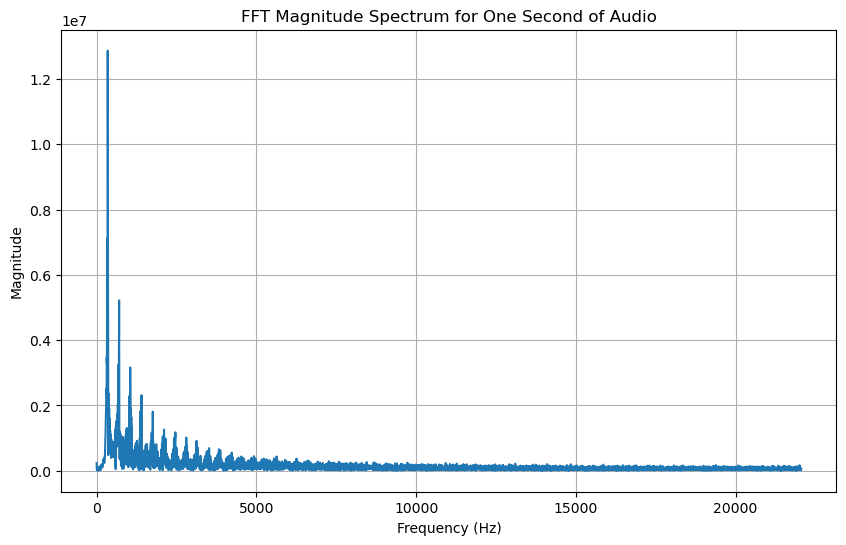

In [5]:
# Extract one second of audio (fs samples correspond to one second)
one_second_audio = audio[:fs]

# Compute the FFT for one second of audio
fft_result = np.fft.rfft(one_second_audio)
frequencies = np.fft.rfftfreq(len(one_second_audio), 1 / fs)

# Find the frequency with the maximum magnitude
magnitudes = np.abs(fft_result)  # Magnitude of FFT
max_magnitude_idx = np.argmax(magnitudes)  # Index of the max magnitude
max_frequency = frequencies[max_magnitude_idx]  # Corresponding frequency

# Print the frequency with the maximum magnitude
print(f"The frequency with the maximum magnitude is {max_frequency:.2f} Hz")

# Plot the FFT for visualization (optional)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.title("FFT Magnitude Spectrum for One Second of Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


In [6]:
def getFreq(startSec, stopSec, audio, fs):
    """
    Get the frequency with the maximum magnitude in the specified time interval.
    Args:
        startSec (float): Start time in seconds.
        stopSec (float): Stop time in seconds.
        audio (numpy.ndarray): The audio data.
        fs (int): Sampling rate in Hz.

    Returns:
        float: Frequency with the maximum magnitude.
    """
    # Calculate start and stop indices
    start_idx = int(np.floor(fs * startSec))
    stop_idx = int(np.floor(fs * stopSec))

    # Ensure stop index does not exceed audio length
    stop_idx = min(stop_idx, len(audio))

    # Extract the audio interval
    if start_idx >= stop_idx or stop_idx <= 0 or start_idx >= len(audio):
        return 0  #edge case
    
    one_interval_audio = audio[start_idx:stop_idx]

    # Compute the FFT for the specified interval
    fft_result = np.fft.rfft(one_interval_audio)
    frequencies = np.fft.rfftfreq(len(one_interval_audio), 1 / fs)

    # Find the frequency with the maximum magnitude
    magnitudes = np.abs(fft_result)  # Magnitude of FFT
    max_magnitude_idx = np.argmax(magnitudes)  # Index of the max magnitude
    max_frequency = frequencies[max_magnitude_idx]  # Corresponding frequency

    return int(max_frequency)

# Example audio and sampling rate
# Assuming `audio` and `fs` are already defined and loaded (e.g., from wavfile.read)
leList = []
prec = 0.01 # Precision (interval length in seconds)
timeOfSample = 0.6 #how long the audio file is in seconds
# Compute frequencies for intervals
for i in np.arange(prec, timeOfSample+1, prec):  # Use numpy.arange for floating-point steps
    freq = getFreq(i - prec, i, audio, fs)
    leList.append(freq)


print(leList)
print(len(leList))


[300, 300, 299, 300, 400, 300, 400, 400, 300, 300, 300, 300, 400, 400, 400, 400, 500, 500, 600, 600, 700, 800, 800, 900, 1000, 1000, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
159


In [8]:
leList2 = [300, 300, 299, 300, 400, 300, 400, 400, 300, 300, 300, 300, 400, 400, 400, 400, 500, 500, 600, 600, 700, 800, 800, 900, 1000, 1000, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1028]

In [9]:
print(len(leList2))

38
